In [255]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

import pint
import pint_pandas

In [256]:
# %matplotlib widget

In [257]:
units = pint_pandas.PintType.ureg
units.setup_matplotlib()

In [258]:
run = '9.5'
data_in_radians = False
time_correct_origin = False

In [259]:
height_data = pd.read_csv(f'../../data/{run}__height_data.csv', index_col=0)
height_data.dropna(inplace=True)
height_data.head()

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,X6,Y6,X7,Y7
t,,,,,,,,,,,,,,
0.000000,-55.17896,-100.0349,-45.10173,-100.5265,-26.29910,-100.6494,-9.094082,-101.2638,16.83634,-101.2638,28.14250,-101.7554,41.41494,-101.7554
0.033367,-55.17089,-100.0386,-45.01069,-100.4641,-26.55924,-100.6372,-9.074979,-101.2657,16.78172,-101.2629,28.10217,-101.7604,41.41494,-101.7554
0.066733,-55.16404,-100.0379,-45.03238,-100.4750,-26.34920,-100.6359,-8.924314,-101.2692,16.81973,-101.2625,28.10788,-101.7586,41.41494,-101.7554
0.100100,-55.16670,-100.0383,-45.04010,-100.4794,-26.32511,-100.5939,-8.899344,-101.2683,16.82850,-101.2635,28.11689,-101.7591,41.41494,-101.7554
0.133467,-55.17539,-100.0379,-45.04223,-100.4797,-26.21184,-100.6008,-8.888387,-101.2673,16.90273,-101.2595,28.13384,-101.7536,41.41494,-101.7554


In [260]:
x = height_data.iloc[:,::2]
y = height_data.iloc[:,1::2]

x

,X1,X2,X3,X4,X5,X6,X7
t,,,,,,,
0.000000,-55.17896,-45.10173,-26.29910,-9.094082,16.83634,28.14250,41.41494
0.033367,-55.17089,-45.01069,-26.55924,-9.074979,16.78172,28.10217,41.41494
0.066733,-55.16404,-45.03238,-26.34920,-8.924314,16.81973,28.10788,41.41494
0.100100,-55.16670,-45.04010,-26.32511,-8.899344,16.82850,28.11689,41.41494
0.133467,-55.17539,-45.04223,-26.21184,-8.888387,16.90273,28.13384,41.41494
...,...,...,...,...,...,...,...
17.117100,-34.73270,-18.49879,-16.25461,-2.943895,53.60226,40.43180,53.67059
17.150470,-33.56150,-18.23579,-16.06568,-3.154681,53.60454,40.43180,53.64225
17.183830,-33.50456,-18.15799,-15.73415,-3.091400,53.66322,40.43180,53.62047


In [261]:
good_points = slice(1, -1, 1)

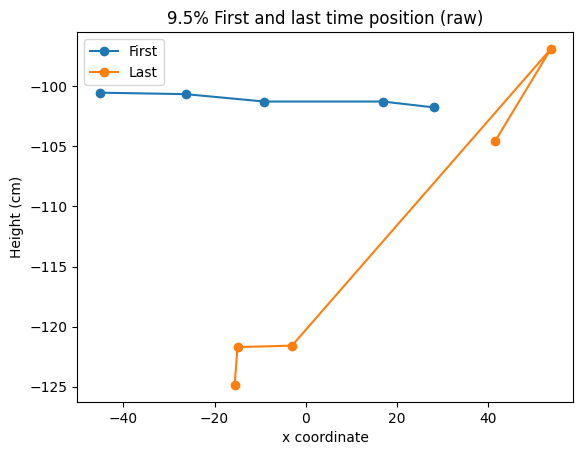

In [262]:
ax = plt.gca()

ax.plot(x.iloc[0, good_points], y.iloc[0, good_points], label='First', marker='o')
ax.plot(x.iloc[-1, good_points], y.iloc[-1, good_points], label='Last', marker='o')

ax.legend()
ax.set_title(f'{run}% First and last time position (raw)')
ax.set_xlabel('x coordinate')
ax.set_ylabel('Height (cm)')

plt.show()

In [263]:
# fig, h_ax = plt.subplots()

# line, = h_ax.plot(x.iloc[0, good_points], y.iloc[0, good_points], marker='o')
# h_ax.set_xlim((1.1*x.min(axis=None), 1.1*x.max(axis=None)))
# h_ax.set_ylim((1.1*y.min(axis=None), 0.9*y.max(axis=None)))

# h_ax.set_ylabel('Height')
# h_ax.set_xlabel('x coordinate')
# h_ax.set_title('t = 0s')

# def update(frame):
#     global line, h_ax
#     line.set_xdata(x.iloc[frame, good_points])
#     line.set_ydata(y.iloc[frame, good_points])
#     h_ax.set_title(f't = {y.index[frame]:3.3f}s')

# anim = FuncAnimation(fig, update, len(y), blit=False, repeat=True)
# plt.show()

In [264]:
angle_data = pd.read_csv(f'../../data/{run}__origin_with_theta.csv', usecols=['t', 'x', 'y', 'theta'], index_col='t')

if not data_in_radians:
    angle_data['theta'] = np.radians(angle_data['theta'])

angle_data

,x,y,theta
t,,,
0.000000,-61.32360,-110.9724,-0.006427
0.033367,-61.31888,-110.9753,-0.006402
0.066733,-61.31627,-110.9762,-0.006394
0.100100,-61.31722,-110.9758,-0.006398
0.133467,-61.31730,-110.9756,-0.006399
...,...,...,...
17.117100,-55.67053,-154.4765,0.381558
17.150470,-55.67053,-154.4765,0.381558
17.183830,-55.67053,-154.4765,0.380561


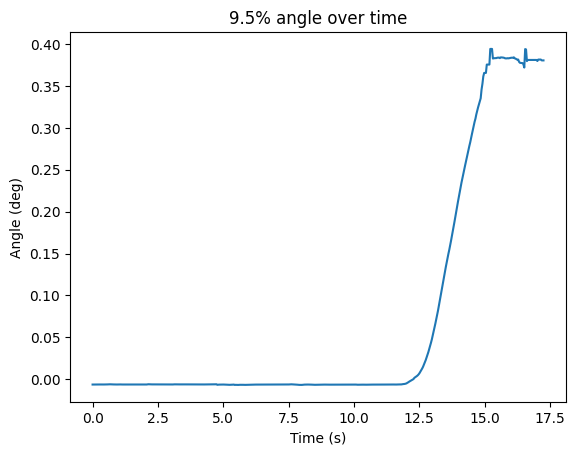

In [265]:
fig, ax = plt.subplots()

ax.plot(angle_data['theta'])
ax.set_title(f'{run}% angle over time')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Angle (deg)')

plt.show()

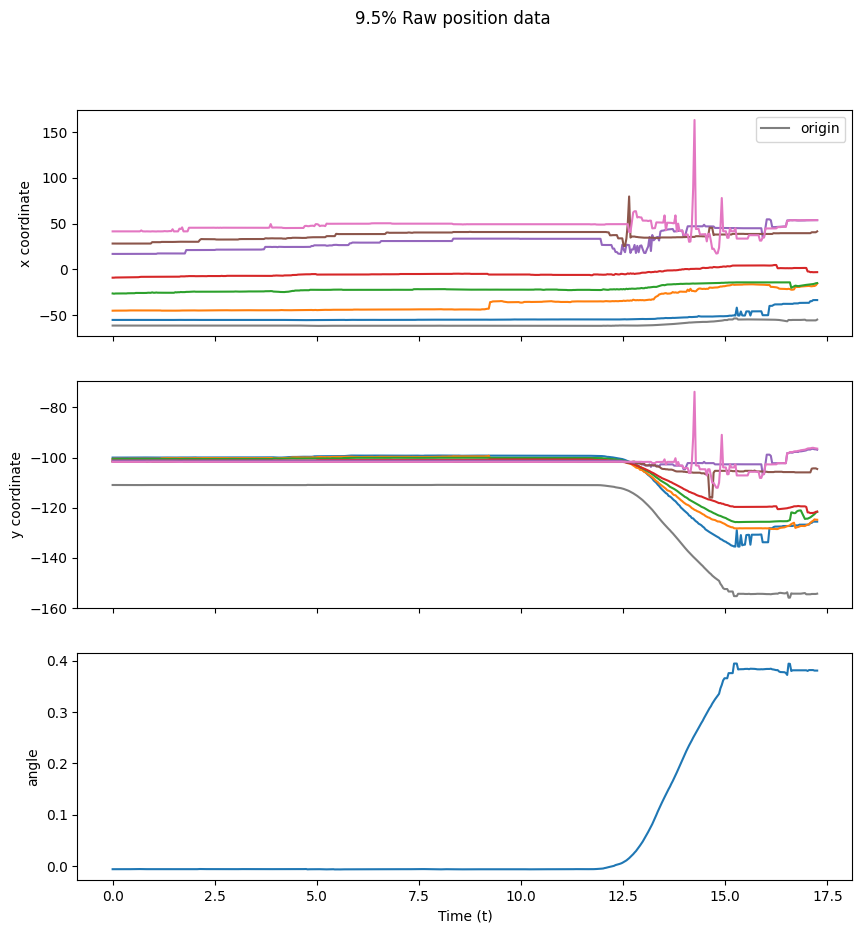

In [266]:
fig, axes = plt.subplots(figsize=(10, 10), nrows=3, sharex=True)

axes[0].plot(x)
axes[0].plot(angle_data['x'], label='origin')
axes[0].set_ylabel('x coordinate')
axes[0].legend()

axes[1].plot(y)
axes[1].plot(angle_data['y'], label='origin')
axes[1].set_ylabel('y coordinate')

axes[2].plot(angle_data['theta'])
axes[2].set_ylabel('angle')

axes[-1].set_xlabel('Time (t)')

fig.suptitle(f'{run}% Raw position data')

plt.show()

In [267]:
# The next four cells are just for time correcting the origin location, which is only a potential problem in the 3% run
# angle_data_corrected is identical to angle_data otherwise
# uncomment the addition in the fourth cell to time-correct

origin_peak_movement = angle_data.index[np.argmax(np.abs(np.diff(angle_data['y'])))]
origin_peak_movement

np.float64(16.5165)

In [268]:
pts_peak_movement = y.index[np.argmax(np.abs(np.diff(y['Y1'])))]
pts_peak_movement

np.float64(15.24857)

In [269]:
time_difference = pts_peak_movement - origin_peak_movement
time_difference

np.float64(-1.2679299999999998)

In [270]:
angle_data_corrected = angle_data.copy()

# time correct angle/origin data when necessary
if time_correct_origin:
    angle_data_corrected.index = angle_data.index + time_difference

angle_data_corrected

,x,y,theta
t,,,
0.000000,-61.32360,-110.9724,-0.006427
0.033367,-61.31888,-110.9753,-0.006402
0.066733,-61.31627,-110.9762,-0.006394
0.100100,-61.31722,-110.9758,-0.006398
0.133467,-61.31730,-110.9756,-0.006399
...,...,...,...
17.117100,-55.67053,-154.4765,0.381558
17.150470,-55.67053,-154.4765,0.381558
17.183830,-55.67053,-154.4765,0.380561


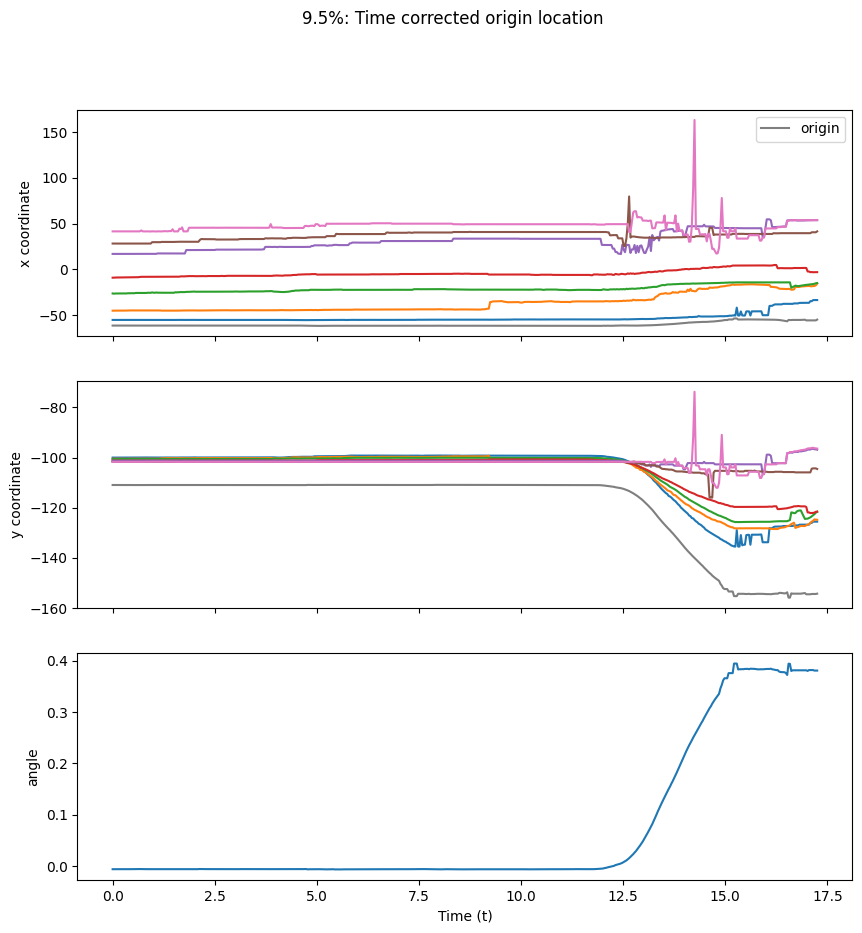

In [271]:
fig, axes = plt.subplots(figsize=(10, 10), nrows=3, sharex=True)

axes[0].plot(x)
axes[0].plot(angle_data_corrected['x'], label='origin')
axes[0].set_ylabel('x coordinate')
axes[0].legend()

axes[1].plot(y)
axes[1].plot(angle_data_corrected['y'], label='origin')
axes[1].set_ylabel('y coordinate')

axes[2].plot(angle_data_corrected['theta'])
axes[2].set_ylabel('angle')

axes[-1].set_xlabel('Time (t)')

fig.suptitle(f'{run}%: Time corrected origin location')

plt.show()

In [272]:
def get_nearest_angle_t(row):
    return np.argmin(np.abs(row['t'] - angle_data_corrected.index))

In [273]:
time_match = height_data.reset_index()[['t']]
time_match['angle_t_i'] = time_match.apply(get_nearest_angle_t, axis=1)
time_match['angle_t'] = angle_data_corrected.index[time_match['angle_t_i']]
# time_match['angle'] = angle_data['theta'].values[time_match['angle_t_i']]
# time_match.set_index('t', inplace=True)
# time_match

time_match = pd.merge(time_match, angle_data_corrected, how='left', left_on='angle_t', right_on='t')
time_match.set_index('t', inplace=True)
time_match

,angle_t_i,angle_t,x,y,theta
t,,,,,
0.000000,0,0.000000,-61.32360,-110.9724,-0.006427
0.033367,1,0.033367,-61.31888,-110.9753,-0.006402
0.066733,2,0.066733,-61.31627,-110.9762,-0.006394
0.100100,3,0.100100,-61.31722,-110.9758,-0.006398
0.133467,4,0.133467,-61.31730,-110.9756,-0.006399
...,...,...,...,...,...
17.117100,511,17.117100,-55.67053,-154.4765,0.381558
17.150470,512,17.150470,-55.67053,-154.4765,0.381558
17.183830,513,17.183830,-55.67053,-154.4765,0.380561


In [274]:
# This seems cursed
origin_removed_x = (x.T - time_match['x']).T
origin_removed_y = (y.T - time_match['y']).T

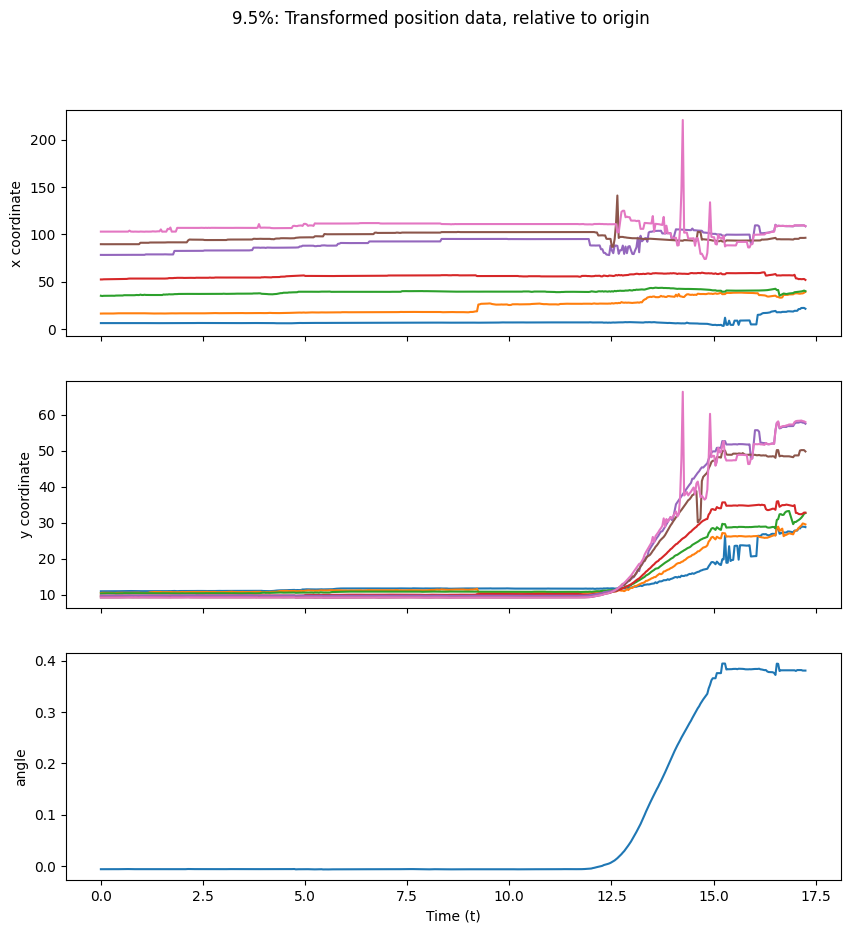

In [275]:
fig, axes = plt.subplots(figsize=(10, 10), nrows=3, sharex=True)

axes[0].plot(origin_removed_x)
# axes[0].plot(angle_data['x'], label='origin')
axes[0].set_ylabel('x coordinate')
# axes[0].legend()

axes[1].plot(origin_removed_y)
# axes[1].plot(angle_data['y'], label='origin')
axes[1].set_ylabel('y coordinate')

axes[2].plot(angle_data['theta'])
axes[2].set_ylabel('angle')


axes[-1].set_xlabel('Time (t)')

fig.suptitle(f'{run}%: Transformed position data, relative to origin')

plt.show()

In [276]:
origin_removed_y.index[origin_removed_y['Y1'].argmax()]

np.float64(17.15047)

In [277]:
n_points = height_data.shape[1] // 2

tx = pd.DataFrame(index=height_data.index)
ty = tx.copy()

for i in range(n_points):
    x_coord = origin_removed_x[f'X{i+1}']
    y_coord = origin_removed_y[f'Y{i+1}']

    # dist = np.sqrt((x_coord - time_match['x'])**2 + (y_coord - time_match['y'])**2)

    # Negative because we want to UNDO the rotation
    angle = -time_match['theta']

    # This is just a rotation matrix
    tx[f'X{i+1}'] = np.cos(angle) * x_coord - np.sin(angle) * y_coord
    ty[f'Y{i+1}'] = np.sin(angle) * x_coord + np.cos(angle) * y_coord

In [278]:
tx

,X1,X2,X3,X4,X5,X6,X7
t,,,,,,,
0.000000,6.074220,16.154401,34.957433,52.166044,78.095930,89.405016,102.677182
0.033367,6.077851,16.240567,34.692747,52.180673,78.036824,89.360227,102.672692
0.066733,6.082162,16.216410,34.900237,52.328816,78.072291,89.363383,102.670150
0.100100,6.080422,16.209636,34.924976,52.354700,78.081987,89.373316,102.671070
0.133467,6.071792,16.207571,35.038351,52.365714,78.156253,89.390295,102.671135
...,...,...,...,...,...,...,...
17.117100,29.998167,45.253077,48.122792,60.977926,122.984759,107.816055,123.189005
17.150470,31.271622,45.616396,48.441273,60.780325,122.987572,107.861782,123.181511
17.183830,31.301276,45.885679,48.908336,60.887234,122.967898,107.851009,123.096042


In [279]:
ty

,Y1,Y2,Y3,Y4,Y5,Y6,Y7
t,,,,,,,
0.000000,10.976765,10.549939,10.547883,10.044069,10.210720,9.791792,9.877092
0.033367,10.975833,10.615384,10.560407,10.043847,10.212173,9.787152,9.877376
0.066733,10.977415,10.605108,10.563676,10.041807,10.213120,9.789209,9.877497
0.100100,10.976624,10.600318,10.605549,10.042644,10.212037,9.788665,9.877439
0.133467,10.976779,10.599832,10.599234,10.043604,10.216446,9.794227,9.877415
...,...,...,...,...,...,...,...
17.117100,18.538232,12.962959,14.088622,10.382464,13.071970,10.635147,13.397528
17.150470,18.566901,13.162199,14.375027,10.456035,13.072857,10.749116,13.454959
17.183830,18.565230,13.704200,14.734146,10.639650,13.021088,10.856679,13.456490


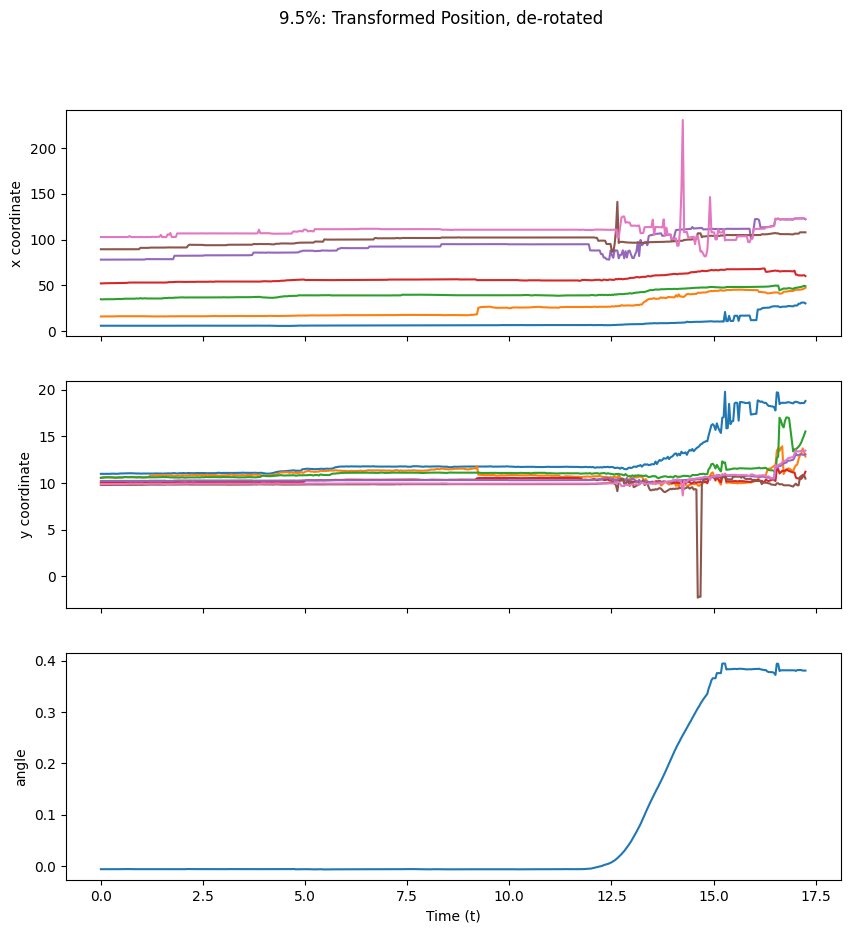

In [280]:
fig, axes = plt.subplots(figsize=(10, 10), nrows=3, sharex=True)

axes[0].plot(tx)
# axes[0].plot(angle_data['x'], label='origin')
axes[0].set_ylabel('x coordinate')
# axes[0].legend()

axes[1].plot(ty)
# axes[1].plot(angle_data['y'], label='origin')
axes[1].set_ylabel('y coordinate')

axes[2].plot(angle_data['theta'])
axes[2].set_ylabel('angle')

axes[-1].set_xlabel('Time (t)')

fig.suptitle(f'{run}%: Transformed Position, de-rotated')

plt.show()